<a href="https://colab.research.google.com/github/simonguzm997/Proyecto_1_BI/blob/main/Proyecto1RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BI Proyecto 1

### 1. Perfilación y preparación

En las siguientes líneas de código se importan las librerías y herramientas necesarias para desarrollar el caso de uso.

In [ ]:
# Librería para manejar las contracciones que se presentan en el inglés.
!pip install contractions

     |████████████████████████████████| 284 kB 23.9 MB/s 
     |████████████████████████████████| 106 kB 46.8 MB/s 


In [ ]:
# librería para manejar las flexiones gramaticales en el idioma inglés.
!pip install inflect
!pip install pandas-profiling==2.7.1

     |████████████████████████████████| 252 kB 14.9 MB/s 
     |████████████████████████████████| 690 kB 23.6 MB/s 
     |████████████████████████████████| 4.7 MB 31.5 MB/s 
     |████████████████████████████████| 58 kB 5.4 MB/s 
     |████████████████████████████████| 812 kB 35.4 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=80892e2c2b7b64bb6cbcacf9e42b3afcc3d3f3a2da3c0e5e5c0eec40cf1cfd1e
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295206 sha256=307514e008ae8e34022277bbaf96d85737a3cb93e5070253064bf3a711a9cb57
  Stored in directory: /root/.cache/pip/wheels/4c/d5/59/5e3e297533ddb09407769762985d134135064c6831e29a914e
Successfully built htmlmin imagehash
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalli

In [ ]:
# librería Natural Language Toolkit, usada para trabajar con textos 
import nltk
# Punkt permite separar un texto en frases.
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Descarga todas las palabras vacias, es decir, aquellas que no aportan nada al significado del texto
# ¿Cuales son esas palabras vacías?

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Descarga de paquete WordNetLemmatizer, este es usado para encontrar el lema de cada palabra
# ¿Qué es el lema de una palabra? ¿Qué tan dificil puede ser obtenerlo, piensa en el caso en que tuvieras que escribir la función que realiza esta tarea?
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
# Instalación de librerias
import pandas as pd
import numpy as np
import sys
import seaborn as sns
from pandas_profiling import ProfileReport

import re, string, unicodedata
import contractions
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer
from pandas.core.dtypes.generic import ABCIndex
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix, plot_precision_recall_curve
from sklearn.base import BaseEstimator, ClassifierMixin
from statistics import mode
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import validation_curve
# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold 

Carga de los datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Se cargan los datos. 
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BI Proyecto 1/clinical_trials_on_cancer_data_clasificacion.csv', sep=',', encoding = 'utf-8')

In [ ]:
# Cantidad de datos y número de variables
data.shape

(12000, 2)

In [ ]:
# Mostrar los datos
data.head()

,label,study_and_condition
0,__label__0,study interventions are Saracatinib . recurren...
1,__label__1,study interventions are Stem cell transplantat...
2,__label__0,study interventions are Lenograstim . recurren...
3,__label__0,study interventions are Doxorubicin . stage ii...
4,__label__1,study interventions are Poly I-C . prostate ca...


In [ ]:
# Es recomendable que todos los pasos preparación se realicen sobre otro archivo.
data_t = data

In [ ]:
data_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   label                12000 non-null  object
 1   study_and_condition  12000 non-null  object
dtypes: object(2)
memory usage: 187.6+ KB


In [ ]:
data_t['label'].value_counts()

__label__0    6000
__label__1    6000
Name: label, dtype: int64

### Limpieza de los datos
Para dejar el archivo en texto plano, sobre todo cuando vienen de diferentes fuentes como HTML, Twitter, XML, entre otros. También para eliminar caracteres especiales y pasar todo a minúscula.

In [ ]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_words.append(word.lower())
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    stop = stopwords.words('english')
    
    for word in words:
        if word not in (stop):
            new_words.append(word)

    return new_words

def preprocessing(words):
    words = to_lowercase(words)
    words = replace_numbers(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words

In [ ]:
# Eliminación registros con ausencias
data_t = data_t.dropna()
# Eliminación de registros duplicados.
data_t = data_t.drop_duplicates()
data_t['label'].value_counts()

__label__1    5996
__label__0    5992
Name: label, dtype: int64

### Tokenización
La tokenización permite dividir frases u oraciones en palabras. Con el fin de desglozar las palabras correctamente para el posterior análisis. Pero primero, se realiza una corrección de las contracciones que pueden estar presentes en los textos. 

In [ ]:
data_t['study_and_condition'] = data_t['study_and_condition'].apply(contractions.fix) #Aplica la corrección de las contracciones

In [ ]:
data_t['words'] = data_t['study_and_condition'].apply(word_tokenize).apply(preprocessing) #Aplica la eliminación del ruido
data_t.head()

,label,study_and_condition,words
0,__label__0,study interventions are Saracatinib . recurren...,"[study, interventions, saracatinib, recurrent,..."
1,__label__1,study interventions are Stem cell transplantat...,"[study, interventions, stem, cell, transplanta..."
2,__label__0,study interventions are Lenograstim . recurren...,"[study, interventions, lenograstim, recurrent,..."
3,__label__0,study interventions are Doxorubicin . stage ii...,"[study, interventions, doxorubicin, stage, iii..."
4,__label__1,study interventions are Poly I-C . prostate ca...,"[study, interventions, poly, ic, prostate, can..."


Eliminar palabras repetidas en todos los registros (study, interventions)

In [ ]:
new_words = []
for word in data_t['words']:
    new_words = word.remove('study')
    new_words = word.remove('interventions')
    data_t['words'] = data_t['words'].replace(new_words)
data_t.head()

,label,study_and_condition,words
0,__label__0,study interventions are Saracatinib . recurren...,"[saracatinib, recurrent, verrucous, carcinoma,..."
1,__label__1,study interventions are Stem cell transplantat...,"[stem, cell, transplantation, hodgkin, lymphom..."
2,__label__0,study interventions are Lenograstim . recurren...,"[lenograstim, recurrent, adult, diffuse, mixed..."
3,__label__0,study interventions are Doxorubicin . stage ii...,"[doxorubicin, stage, iii, diffuse, large, cell..."
4,__label__1,study interventions are Poly I-C . prostate ca...,"[poly, ic, prostate, cancer, diagnosis, unreso..."


### Normalización
En la normalización de los datos se realiza la eliminación de prefijos y sufijos, además de realizar una lemmatización.

In [ ]:
lemmatizer = nltk.stem.WordNetLemmatizer()
wordnet_lemmatizer = WordNetLemmatizer()
stop = stopwords.words('english')

def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

def stem_words(words):
    """Stem words in list of tokenized words"""
    #https://www.datacamp.com/community/tutorials/stemming-lemmatization-python
    porter = PorterStemmer()
    lancaster=LancasterStemmer()
    new_words = []
    for word in words:
        new_words.append(porter.stem(word))
    return new_words
        

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    #https://www.geeksforgeeks.org/python-lemmatization-approaches-with-examples/
    wnl = WordNetLemmatizer()
    new_words = []
    for word in words:
        new_words.append(wnl.lemmatize(word))
    return new_words


def stem_and_lemmatize(words):
    stems = stem_words(words)
    lemmas = lemmatize_verbs(words)
    return stems + lemmas


data_t['words'] = data_t['words'].apply(stem_and_lemmatize) #Aplica lematización y Eliminación de Prefijos y Sufijos.
data_t.head()

,label,study_and_condition,words
0,__label__0,study interventions are Saracatinib . recurren...,"[saracatinib, recurr, verruc, carcinoma, laryn..."
1,__label__1,study interventions are Stem cell transplantat...,"[stem, cell, transplant, hodgkin, lymphoma, di..."
2,__label__0,study interventions are Lenograstim . recurren...,"[lenograstim, recurr, adult, diffus, mix, cell..."
3,__label__0,study interventions are Doxorubicin . stage ii...,"[doxorubicin, stage, iii, diffus, larg, cell, ..."
4,__label__1,study interventions are Poly I-C . prostate ca...,"[poli, ic, prostat, cancer, diagnosi, unresolv..."


###  Selección de campos

Primero, se separa la variable predictora y los textos que se van a utilizar.

In [ ]:
data_t['words'] = data_t['words'].apply(lambda x: ' '.join(map(str, x)))
data_t

,label,study_and_condition,words
0,__label__0,study interventions are Saracatinib . recurren...,saracatinib recurr verruc carcinoma larynx dia...
1,__label__1,study interventions are Stem cell transplantat...,stem cell transplant hodgkin lymphoma diagnosi...
2,__label__0,study interventions are Lenograstim . recurren...,lenograstim recurr adult diffus mix cell lymph...
3,__label__0,study interventions are Doxorubicin . stage ii...,doxorubicin stage iii diffus larg cell lymphom...
4,__label__1,study interventions are Poly I-C . prostate ca...,poli ic prostat cancer diagnosi unresolv ira f...
...,...,...,...
11995,__label__0,study interventions are Prednisolone hemisucci...,prednisolon hemisuccin recurr childhood larg c...
11996,__label__0,study interventions are Bevacizumab . recurren...,bevacizumab recurr rectal cancer diagnosi abso...
11997,__label__1,"study interventions are Antibodies, Monoclonal...",antibodi monoclon recurr lymphoblast lymphoma ...
11998,__label__0,study interventions are Vorinostat . colorecta...,vorinostat colorect cancer diagnosi patient mu...


In [ ]:
data_t['label'] = data_t['label'].replace(['__label__1'],1)
data_t['label'] = data_t['label'].replace(['__label__0'],0)


Aplicamos TF_IDF (Term-frecuency times inverse Document-frecuency) a los datos





In [ ]:
# Source: https://towardsdatascience.com/natural-language-processing-feature-engineering-using-tf-idf-e8b9d00e7e76
vectorizer = TfidfVectorizer()
allDocs = []
for word in data_t['words']:
    allDocs.append(word)
vectors = vectorizer.fit_transform(allDocs)
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
data_tfidf = pd.DataFrame(denselist, columns=feature_names)
data_tfidf.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,01,01910na,025,05,09,0three_two9,0two_two009,10deazaaminopterin,11,12,...,zivaflibercept,zk,zoladex,zoledron,zoledronate,zoledronic,zolmitriptan,zometa,zone,zubrod
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Guardar los DataFrames en csv
#data_t.to_csv('data_frame_resultado.csv')
#data_tfidf.to_csv('tf_idf.csv')

## Modelado con Random Forest (Carlos Figueredo)
Puesto que el negocio busca poder segmentar los pacientes de acuerdo al texto ingresado, nosotros realizaremos una tarea de aprendizaje de tipo clasificación , en este caso con el algoritmo Random Forest

In [ ]:
# Fijemos el número de particiones. Utilizaremos K = 10.
particiones = KFold(n_splits=10, shuffle=True, random_state = 0)

In [ ]:
# Source: https://stackabuse.com/text-classification-with-python-and-scikit-learn/
# Se selecciona la variable objetivo, en este caso "label".
Y = data_t['label']
# Se pasan como inputs los valores a los que se les aplicó TF_IDF
X = data_tfidf

In [ ]:
# Separar los conjuntos de entrenamiento y test

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
# Generando el clasificador con Random Forest
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train, y_train) 

RandomForestClassifier(n_estimators=1200, random_state=0)

In [ ]:
# Realizando la predicción con el clasificador
y_pred = classifier.predict(X_test)

In [ ]:
# Genera el reporte de la clasificación y el puntaje de accuracy
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81      1143
           1       0.84      0.80      0.82      1255

    accuracy                           0.82      2398
   macro avg       0.82      0.82      0.82      2398
weighted avg       0.82      0.82      0.82      2398

0.8185988323603003


In [ ]:
# Matriz de confusión
confusion_matrix(y_test,y_pred)

array([[ 953,  190],
       [ 245, 1010]])

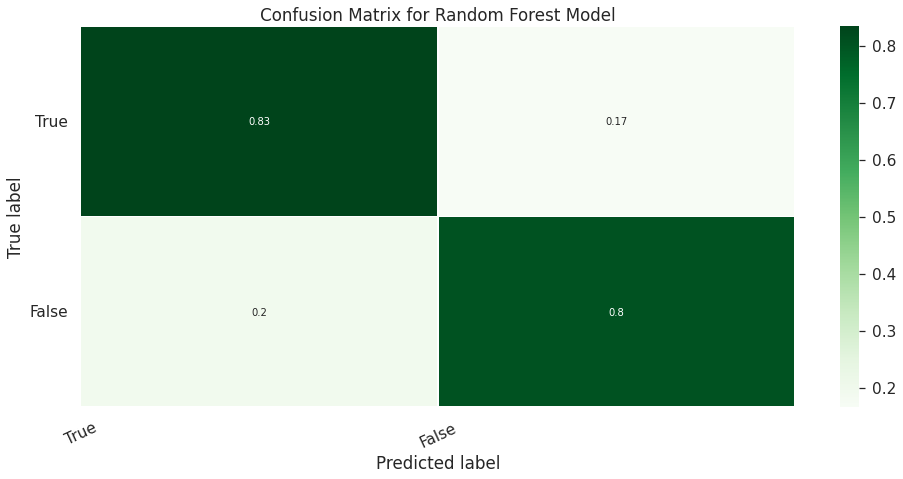

In [ ]:
# Source: https://medium.com/analytics-vidhya/evaluating-a-random-forest-model-9d165595ad56
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['True', 'False']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

### Análisis de resultados de Random Forest



*   El algoritmo arrojó una exactitud del 81% en la clasificación de pacientes para elegibilidad de diagnóstico de cáncer.
*   Debido a la gran cantidad de datos en la matriz de palabras, fue necesario tomar un hiperparámetro común (1000) para que el proceso no dure mucho en realizarse, en lugar de hacer una búsqueda de los mejores hiperparámetros.

